<H1 style="background-color:#00008b;color:#F8F8FF;">Project Report - Phillip Marsh</H1>
<hr>

<H2 style="color:#00008b;">GitHub URL</H2>
Phillip's GutHub can be found at: <a href="https://github.com/PhillipNM/UCDPA_PhillipMarsh" target="_blank">Phillip's GitHub Repository</a>
<pre style="font-family:arial;">
document should contain between 1,500 and 2,00 words
</pre>
<h2 style="color:#00008b;">Abstract</h2>
(short overview of the entire project)

<h2 style="color:#00008b;">Introduction</h2>
(Explain why you chose this project use case)

<h2 style="color:#00008b;">Datasets</h2>
(Provide a description of your dataset and source. Also justify why you chose this source)

<h6>Deciding on the dataset</h6>
<br>
I had several ideas, however, I explored three main ideas:

<pre style="font-family:arial;">
1. Predicting currency fx changes to maximise buys and sells.  
    As I have two children in Canada in university the fx rate for USD to CAD is always top of mind.  After exploring this for a bit the challenge to understand the market conditions that I could use for making predictions did not seem to fit well with what I needed for this project.
2. Flight delays, cancellations and the average compensation.  Are the airlines "gaming" the system to not pay-out customers
    given the turmoil in travel I thought it would be interesting to compare recent cancellations, delays and reasons and compensations vs. pre-covid data. I researched for datasets but could not find anything current, although there were some sites that may have had data; I would have to pay for and for this reason I decided against this topic.
3. COVID data.  This idea would have plenty of source data out there but would it offer the ability to make predictions and not just forecasting trends.
</pre>

   I picked the COVID idea as there is good data and the types of calculations and techniques required would lend itself to the project easily. This data is something we are all very familiar with at this time. Governments, countries and organizations and corporations have struggled with rules and regulations to balance controlling the epidemic vs. economic stability.

I reviewed a couple of sources and in the end selected "Our World In Data" (OWID).  OWID has a comprehensive set of publicly available data specifically for COVID.  In working with the FIL business continuity team, I assited with the COVID response. I came across this data source and found it very useful. In the end this is the source we used to provide global situational updates for the senior members in the organization so they could decide on stay at home and return to office across the organization.

source of covid data: https://github.com/owid/covid-19-data/tree/master/public/data 
<p>Originally I downloaded a (.csv) copy of the data to use but the file was large (I was getting an error that the file was to big for my type of GitHub repository account) when I tried to push the data to my GitHub repository.  I then researched how I could link to an external csv file, and this solved the problem</p>

source of GDP data: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false
<p>the file is a zip file which is difficult to connect to so in this case I downloaded the file and unzipped it.</p>


<h3>Import and review the data</h3>

In [2]:
# Import packages
import pandas as pd
import requests
import io
import datetime as dt
from datetime import datetime
from datetime import timedelta
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import seaborn as sb

# Machine learning



# Variables
column_count_limit=30 #number of columns deemed to be managble for this review


<h4>import data</h4>

In [3]:
# Import COVID data

# Link and download COVID dataset from OWID
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv" 
download = requests.get(url).content

# Create the COVID as a pandas dataframe
covid_data_raw = pd.read_csv(io.StringIO(download.decode('utf-8')),parse_dates=['date']) #need to parse the date field
#source: https://stackoverflow.com/questions/59004960/converting-date-format-in-a-dataframe-from-a-csv-file

# Import World Bank GDP data

    # source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false

    # Create the GDP raw file as a pandas dataframe, headers start on row 4
gdp_data_raw = pd.read_csv("/Users/Phillip/UDCPA_PhillipMarsh/data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4489151.csv", skiprows=4)

 

<h5>exploring the covid data</h5>

In [4]:
#covid_data_raw.columns.tolist()
#columns_lst = covid_data_raw.columns.tolist() # create a list of the column headers from the dataframe
#columns_len = len(columns_lst)

#columns_len

In [91]:
# name of the dataframe with comments

def name_obj(df, comment, comment2=""):
    """Create statement naming the dataframe around comment and comment2
    
    Args:
        df (dataFrame): the name of the dataframe
        comment (string): comment string which goes before the name of the dataframe
        comment2 (string): comment string which goes after the name of the dataframe (optional)
    """
    name =[x for x in globals() if globals()[x] is df][0]
    return (comment+name+comment2)

#test the function
print(name_obj(covid_data_raw,"Dataframe Name is:"))
print(name_obj(gdp_data_raw,"Dataframe Name is:"))

Dataframe Name is:covid_data_raw
Dataframe Name is:gdp_data_raw


In [92]:
# create functions for reviewing dataframes

# create a function to make list from the column header names of a dataframe
def column_headers_list(df):
    """create a list of column headers
    
    Args:
        df (DataFrame): the name of the dataframe to use
    
    Returns:
        list of column headers
    """
    
    columns_lst = df.columns.tolist() # create a list of the column headers from the dataframe
        
    return columns_lst

#test the function
print(column_headers_list(covid_data_raw))

print()
print(column_headers_list(gdp_data_raw))


['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [93]:
# create a function to count the number of items in the list from the column header names list of a dataframe

columns_lst_test = column_headers_list(covid_data_raw)
columns_len_test = len(columns_lst_test)


# Test function

print(columns_lst_test)
print(columns_len_test)


['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [94]:
# create a function determine if the data set is too wide
def columns_comment(xlist,column_count_limit=30):
    """Use column_len to decide if the dataframe is too large to manage
    
    Args:
        xlist(list): list to review
        columns_len(int): from column_headers_list function
        column_count_limit(float): limi number of columns to compare
    """
    columns_len = len(xlist)
    
    if columns_len>column_count_limit:
        comment = "There are many columns ("+str(columns_len)+"), Drop a some of them to imporve performance and the size of the file"
    else:
        comment = "Number of columns appears manageable"
    
    return comment, columns_len



In [95]:
#test function columns_comment()

# test for covid data
columns_lst_covid = column_headers_list(covid_data_raw) #list of headers

comment_covid = columns_comment(columns_lst_covid,)[0] #Comment string
header_len_covid = columns_comment(columns_lst_covid,column_count_limit=30)[1] #Number of items in list

print(comment_covid)

print("-"*100)

There are many columns (67), Drop a some of them to imporve performance and the size of the file
----------------------------------------------------------------------------------------------------


In [96]:
# test for gdp data
columns_lst_gdp = column_headers_list(gdp_data_raw)

comment_gdp = columns_comment(columns_lst_gdp)[0]
header_len_gdp = columns_comment(columns_lst_gdp,column_count_limit=30)[1]


print(comment_gdp)

print("-"*100)

There are many columns (67), Drop a some of them to imporve performance and the size of the file
----------------------------------------------------------------------------------------------------


In [97]:
# Understanding the data 

# Information (shape) on are the records + columns

covid_data_raw.shape

(216824, 67)

In [101]:
# show the column headers and the number of columns

data = covid_data_raw

columns_len = df.shape[1] # count the number of columns in the list

covid_name = name_obj(data,"The headers from the", "Dataframe are:")
print(column_headers_list(data))

print()

description_covid_raw = name_obj(data,"The "," DataFrame has "+str(columns_len)+" columns")
print(description_covid_raw)

print()

#print(columns_comment(column_headers_list(df))) #xlist,column_count_limit=30)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [102]:
# Summary of covid_data_raw file
rows = covid_data_raw.shape[0]
cols = covid_data_raw.shape[1]

print("The raw data file has {} rows of data".format(f"{rows:,d}")," and {} columns".format(f"{cols:,d}"))
if cols>column_count_limit:
    print("There are many columns, drop a some of them to imporve performance and the size of the file")
else:
    print("Number of columns appears manageable")

The raw data file has 216,824 rows of data  and 67 columns
There are many columns, drop a some of them to imporve performance and the size of the file


In [116]:
# drop columns
    #source: https://datatofish.com/drop-columns-pandas-dataframe/#:~:text=Here%20is%20the%20approach%20that%20you%20can%20use,Python%20code%20to%20drop%20the%20%E2%80%98Shape%E2%80%99%20column%20is%3A
covid_data = covid_data_raw.drop([
    'continent',
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'new_cases_smoothed_per_million',
    'new_deaths_smoothed_per_million',
    'icu_patients_per_million',
    'hosp_patients',
    'hosp_patients_per_million',
    'weekly_icu_admissions',
    'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_smoothed',
    'tests_per_case',
    'tests_units',
    'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred',
    'stringency_index','median_age',
    'aged_65_older',
    'aged_70_older',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'female_smokers',
    'male_smokers',
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'life_expectancy',
    'human_development_index',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative',
    'excess_mortality',
    'excess_mortality_cumulative_per_million'
    ], 
    axis=1)

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216824 entries, 0 to 216823
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         216824 non-null  object        
 1   location                         216824 non-null  object        
 2   date                             216824 non-null  datetime64[ns]
 3   total_cases                      207912 non-null  float64       
 4   new_cases                        207672 non-null  float64       
 5   total_deaths                     188868 non-null  float64       
 6   new_deaths                       188820 non-null  float64       
 7   total_cases_per_million          206960 non-null  float64       
 8   new_cases_per_million            206720 non-null  float64       
 9   total_deaths_per_million         187929 non-null  float64       
 10  new_deaths_per_million           187881 non-

In [117]:
#list of covid countrie ISO code

# sort by ISO_code and Date
covid_data = covid_data.sort_values(['iso_code', 'location', 'date'])

Country_lst_covid_1 = covid_data["iso_code"].tolist()

#print(Country_lst_covid_1)

# Function to get unique values
  
  
def unique(list1):
  
    # Print directly by using * symbol
    print(*Counter(list1))

    
country_ISO_list = unique(Country_lst_covid_1)


ABW AFG AGO AIA ALB AND ARE ARG ARM ATG AUS AUT AZE BDI BEL BEN BES BFA BGD BGR BHR BHS BIH BLR BLZ BMU BOL BRA BRB BRN BTN BWA CAF CAN CHE CHL CHN CIV CMR COD COG COK COL COM CPV CRI CUB CUW CYM CYP CZE DEU DJI DMA DNK DOM DZA ECU EGY ERI ESH ESP EST ETH FIN FJI FLK FRA FRO FSM GAB GBR GEO GGY GHA GIB GIN GMB GNB GNQ GRC GRD GRL GTM GUM GUY HKG HND HRV HTI HUN IDN IMN IND IRL IRN IRQ ISL ISR ITA JAM JEY JOR JPN KAZ KEN KGZ KHM KIR KNA KOR KWT LAO LBN LBR LBY LCA LIE LKA LSO LTU LUX LVA MAC MAR MCO MDA MDG MDV MEX MHL MKD MLI MLT MMR MNE MNG MNP MOZ MRT MSR MUS MWI MYS NAM NCL NER NGA NIC NIU NLD NOR NPL NRU NZL OMN OWID_AFR OWID_ASI OWID_CYN OWID_EUN OWID_EUR OWID_HIC OWID_INT OWID_KOS OWID_LIC OWID_LMC OWID_NAM OWID_OCE OWID_SAM OWID_UMC OWID_WRL PAK PAN PCN PER PHL PLW PNG POL PRI PRK PRT PRY PSE PYF QAT ROU RUS RWA SAU SDN SEN SGP SHN SLB SLE SLV SMR SOM SPM SRB SSD STP SUR SVK SVN SWE SWZ SXM SYC SYR TCA TCD TGO THA TJK TKL TKM TLS TON TTO TUN TUR TUV TWN TZA UGA UKR URY USA UZB V

In [118]:
# drop the "OWID_" records

# how many records have the OWID ISO_Code?
covid_data_owid = covid_data[covid_data["iso_code"].str.contains("OWID")] #OWID data
print("OWID data shape: "+str(covid_data_owid.shape))

covid_data = covid_data[covid_data["iso_code"].str.contains("OWID")==False] #Non OWID data
print("Non OWID data shape: "+str(covid_data.shape))


OWID data shape: (13711, 26)
Non OWID data shape: (203113, 26)


In [119]:
# list the country ISO Codes again
Country_lst_covid_1 = covid_data["iso_code"].tolist()

#re-run the unique records; OWID records are no longer displayed
country_ISO_list = unique(Country_lst_covid_1)

ABW AFG AGO AIA ALB AND ARE ARG ARM ATG AUS AUT AZE BDI BEL BEN BES BFA BGD BGR BHR BHS BIH BLR BLZ BMU BOL BRA BRB BRN BTN BWA CAF CAN CHE CHL CHN CIV CMR COD COG COK COL COM CPV CRI CUB CUW CYM CYP CZE DEU DJI DMA DNK DOM DZA ECU EGY ERI ESH ESP EST ETH FIN FJI FLK FRA FRO FSM GAB GBR GEO GGY GHA GIB GIN GMB GNB GNQ GRC GRD GRL GTM GUM GUY HKG HND HRV HTI HUN IDN IMN IND IRL IRN IRQ ISL ISR ITA JAM JEY JOR JPN KAZ KEN KGZ KHM KIR KNA KOR KWT LAO LBN LBR LBY LCA LIE LKA LSO LTU LUX LVA MAC MAR MCO MDA MDG MDV MEX MHL MKD MLI MLT MMR MNE MNG MNP MOZ MRT MSR MUS MWI MYS NAM NCL NER NGA NIC NIU NLD NOR NPL NRU NZL OMN PAK PAN PCN PER PHL PLW PNG POL PRI PRK PRT PRY PSE PYF QAT ROU RUS RWA SAU SDN SEN SGP SHN SLB SLE SLV SMR SOM SPM SRB SSD STP SUR SVK SVN SWE SWZ SXM SYC SYR TCA TCD TGO THA TJK TKL TKM TLS TON TTO TUN TUR TUV TWN TZA UGA UKR URY USA UZB VAT VCT VEN VGB VIR VNM VUT WLF WSM YEM ZAF ZMB ZWE


In [122]:
# show the column headers and the number of columns

df = covid_data

columns_len = df.shape[1] # count the number of columns in the list

print(name_obj(df,"The headers from the ", " DataFrame are:"))
column_headers_list(df)


The headers from the df DataFrame are:


['iso_code',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'reproduction_rate',
 'icu_patients',
 'total_tests',
 'new_tests',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'population',
 'population_density',
 'gdp_per_capita',
 'extreme_poverty']

In [123]:
# print a summary of covid_data

# Summary of covid_data_raw file
rows = covid_data.shape[0]
cols = covid_data.shape[1]

print("The raw data file has {} rows of data".format(f"{rows:,d}"),"and {} columns".format(f"{cols:,d}"))
if cols>column_count_limit:
    print("There are many columns, drop a some of them to imporve performance and the size of the file")
else:
    print("Number of columns appears manageable")

The raw data file has 203,113 rows of data and 26 columns
Number of columns appears manageable


In [124]:
covid_data.head(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,population_density,gdp_per_capita,extreme_poverty
9351,ABW,Aruba,2020-03-13,2.0,2.0,NaN,NaN,18.773,18.773,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9352,ABW,Aruba,2020-03-14,2.0,0.0,NaN,NaN,18.773,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9353,ABW,Aruba,2020-03-15,2.0,0.0,NaN,NaN,18.773,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9354,ABW,Aruba,2020-03-16,2.0,0.0,NaN,NaN,18.773,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9355,ABW,Aruba,2020-03-17,3.0,1.0,NaN,NaN,28.159,9.386,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9356,ABW,Aruba,2020-03-18,4.0,1.0,NaN,NaN,37.546,9.386,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9357,ABW,Aruba,2020-03-19,4.0,0.0,NaN,NaN,37.546,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9358,ABW,Aruba,2020-03-20,5.0,1.0,NaN,NaN,46.932,9.386,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9359,ABW,Aruba,2020-03-21,5.0,0.0,NaN,NaN,46.932,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN
9360,ABW,Aruba,2020-03-22,9.0,4.0,NaN,NaN,84.478,37.546,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106536.0,584.8,35973.781,NaN


In [125]:
# Review Null data
# pd.set_option('display.max_rows',None)
print("Null data:")
print(covid_data.isna().sum())

Null data:
iso_code                                0
location                                0
date                                    0
total_cases                          8588
new_cases                            8835
total_deaths                        27438
new_deaths                          27665
total_cases_per_million              8588
new_cases_per_million                8835
total_deaths_per_million            27438
new_deaths_per_million              27665
reproduction_rate                   42025
icu_patients                       175467
total_tests                        123914
new_tests                          127813
new_tests_smoothed_per_thousand     99533
positive_rate                      107571
total_vaccinations                 150386
people_vaccinated                  153057
people_fully_vaccinated            155628
total_boosters                     177662
new_vaccinations                   161014
population                              0
population_density     

In [128]:
# How many records am I dealing with

#total_records = covid_data.count(axis=1)
#print(total_records)
#print("")

# show the countries/ locations in the data
print("ISO codes and Country")
print(covid_data.pivot_table(index = ['iso_code', 'location'], aggfunc ='size'))


print("")
# df.size
print("Size:")
print(covid_data.size)

print("")
# df.isnull()
column_picker ="total_deaths"
bool_series_null =pd.isnull(covid_data[column_picker])

print("Null",column_picker,": ")
print(covid_data[bool_series_null])
#print(covid_data.isnull())

print("")
# df.notnull()
bool_series = pd.notnull(covid_data[column_picker])
print("Not null:")
print(covid_data[bool_series])

print("")
# df.describe()
print("Describe:")
print(covid_data.describe)


ISO codes and Country
iso_code  location    
ABW       Aruba           917
AFG       Afghanistan     935
AGO       Angola          910
AIA       Anguilla        902
ALB       Albania         934
                         ... 
WSM       Samoa           667
YEM       Yemen           889
ZAF       South Africa    952
ZMB       Zambia          912
ZWE       Zimbabwe        910
Length: 229, dtype: int64

Size:
5280938

Null total_deaths : 
       iso_code  location       date  total_cases  new_cases  total_deaths  \
9351        ABW     Aruba 2020-03-13          2.0        2.0           NaN   
9352        ABW     Aruba 2020-03-14          2.0        0.0           NaN   
9353        ABW     Aruba 2020-03-15          2.0        0.0           NaN   
9354        ABW     Aruba 2020-03-16          2.0        0.0           NaN   
9355        ABW     Aruba 2020-03-17          3.0        1.0           NaN   
...         ...       ...        ...          ...        ...           ...   
215015      ZMB 

In [129]:
# Correlations of the covid_data
covid_data.corr()


,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,population_density,gdp_per_capita,extreme_poverty
total_cases,1.000000,0.512014,0.897353,0.417343,0.224716,0.043841,0.262642,0.023864,0.014626,0.477119,...,0.043714,0.331516,0.602991,0.562306,0.490700,0.188849,0.343881,-0.029622,0.114456,-0.114186
new_cases,0.512014,1.000000,0.453492,0.554995,0.125387,0.181972,0.131404,0.079394,0.066950,0.569806,...,0.177079,0.119331,0.216570,0.198280,0.265740,0.105510,0.203855,-0.019996,0.104531,-0.095150
total_deaths,0.897353,0.453492,1.000000,0.509314,0.119140,0.016509,0.340978,0.047246,0.027414,0.610849,...,0.029354,0.303091,0.575374,0.526776,0.411395,0.214429,0.346358,-0.038321,0.081891,-0.136373
new_deaths,0.417343,0.554995,0.509314,1.000000,0.003196,0.039432,0.122225,0.191367,0.029530,0.847929,...,0.123561,0.077528,0.188189,0.139937,0.147578,0.154157,0.277244,-0.030425,0.069257,-0.112581
total_cases_per_million,0.224716,0.125387,0.119140,0.003196,1.000000,0.237312,0.603259,0.073452,-0.023964,-0.043306,...,0.289039,-0.066543,-0.036076,-0.027483,0.051280,-0.131359,-0.074151,0.023206,0.301940,-0.307616
new_cases_per_million,0.043841,0.181972,0.016509,0.039432,0.237312,1.000000,0.148623,0.234013,0.103267,0.031931,...,0.352941,-0.042481,-0.036367,-0.030600,0.002175,-0.059146,-0.028763,0.016949,0.140094,-0.162635
total_deaths_per_million,0.262642,0.131404,0.340978,0.122225,0.603259,0.148623,1.000000,0.175179,0.007482,0.090012,...,0.196588,-0.071573,-0.009112,-0.016277,0.051338,-0.110597,-0.060678,-0.009474,0.157352,-0.352130
new_deaths_per_million,0.023864,0.079394,0.047246,0.191367,0.073452,0.234013,0.175179,1.000000,0.042118,0.210986,...,0.314355,-0.060418,-0.051516,-0.058971,-0.047679,-0.045192,-0.028623,0.003562,0.075946,-0.225695
reproduction_rate,0.014626,0.066950,0.027414,0.029530,-0.023964,0.103267,0.007482,0.042118,1.000000,-0.049049,...,0.086013,0.022766,-0.001826,0.006815,-0.032033,0.021627,0.052608,0.020368,0.140617,-0.191149
icu_patients,0.477119,0.569806,0.610849,0.847929,-0.043306,0.031931,0.090012,0.210986,-0.049049,1.000000,...,0.063698,0.484245,0.540211,0.510690,0.227717,0.548519,0.768065,-0.103535,0.107765,0.009860


In [130]:
# Import GDP data

#look at info for gdp data
print(gdp_data_raw.info())

# do not need most of the columns so will remove cols 4:63
gdp_data = gdp_data_raw.drop(gdp_data_raw.iloc[:,4:63],axis = 1)

gdp_data.columns = [c.replace(' ', '_') for c in gdp_data.columns]

print(gdp_data.info())
print()
print(gdp_data.head())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            133 non-null    float64
 5   1961            135 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            155 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            169 non-null    float64
 15  1971            172 non-null    float64
 16  1972            172 non-null    float64
 17  1973            172 non-null    flo

In [135]:
# show the column headers and the number of columns

df = gdp_data

columns_len = df.shape[1] # count the number of columns in the list

print(name_obj(gdp_data,"The headers from the ", " Dataframe are:"))
column_headers_list(df)

print()

print(name_obj(gdp_data,"The "," DataFrame has "+str(columns_len)+" columns"))

print()

#print(columns_comment())

The headers from the df Dataframe are:

The df DataFrame has 8 columns



In [136]:
# Correlations of the gdp_data
gdp_data.corr()

,2019,2020,2021,Unnamed:_66
2019,1.000000,0.999882,0.99950,NaN
2020,0.999882,1.000000,0.99963,NaN
2021,0.999500,0.999630,1.00000,NaN
Unnamed:_66,NaN,NaN,NaN,NaN


<h4>Summary of data</h4>

In [137]:
# Summary of Covid data
print("summary of Covid data")
print()

# Number of unique countries
n = covid_data.iso_code.nunique()
print("No of unique countries (covid_data):",n)

print("")

# Number of unique dates
n = covid_data.date.nunique()

# What are the range of dates in data
beg_date = min(covid_data["date"]) #starting point of the available data
end_date = max(covid_data["date"]) #most recent data in the file

print("No of unique dates: ",n)
print("From: ",beg_date.strftime("%b %d %Y")," to: ",end_date.strftime("%b %d %Y"))
print("")

# Number of records
rec = covid_data.shape[0]
col = covid_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 
#source: https://stackoverflow.com/questions/60934535/format-integer-with-comma-using-python-printf
print("")

summary of Covid data

No of unique countries (covid_data): 229

No of unique dates:  990
From:  Jan 01 2020  to:  Sep 16 2022

No of rows:  203,113
No of columns:  26



In [138]:
# Summary of GDP data

print("summary of GDP Data")
print()


# Number of unique countries
n = gdp_data.Country_Code.nunique()
print("No of unique countries: ",n)
print("")

# Number of records
rec = gdp_data.shape[0]
col = gdp_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 

summary of GDP Data

No of unique countries:  266

No of rows:  266
No of columns:  8


In [139]:
# Calculations for report:

# date calculations
# There needs to be a n_day (number of days) total for certain total columns to in turn calculate 
# comparative data against 100k of a countries population

days_calc = 14 #n days for calculations.  14 days is standard but we could run for differnt number of days eg. 25days

# n day calculations can't begin until the nth day after the first date in the dataset (beg_date)
first_calc_date = beg_date + - timedelta(days=days_calc)


# calculate the start date for the n days data for each record
n_day_start = covid_data["date"] - timedelta(days=days_calc)

print(n_day_start)
print()

# Insert a column with the n day start date
covid_data.insert(loc=3, column="n_day_start_date", value=n_day_start, allow_duplicates=True)
print(covid_data.info())



9351     2020-02-28
9352     2020-02-29
9353     2020-03-01
9354     2020-03-02
9355     2020-03-03
            ...    
216819   2022-08-28
216820   2022-08-29
216821   2022-08-30
216822   2022-08-31
216823   2022-09-01
Name: date, Length: 203113, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203113 entries, 9351 to 216823
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         203113 non-null  object        
 1   location                         203113 non-null  object        
 2   date                             203113 non-null  datetime64[ns]
 3   n_day_start_date                 203113 non-null  datetime64[ns]
 4   total_cases                      194525 non-null  float64       
 5   new_cases                        194278 non-null  float64       
 6   total_deaths                     175675 non-null  

In [142]:
# n days totals 
# (https://stackoverflow.com/questions/28236305/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas)
# https://python.tutorialink.com/calculate-14-day-rolling-average-on-data-with-two-hierarchies/

covid_data.sort_values(['iso_code','date'], ascending=(True,True), inplace=True)

# Rolling new cases 
rolling_new_cases = covid_data.groupby(['iso_code'])['new_cases'].transform(lambda x: x.rolling(days_calc, 1).sum())

# Insert a column with the "n" rolling new cases

#new_column string name
new_column = str(days_calc)+"_days_rolling_new_cases"
print(new_column)

print(new_column in covid_data.columns) # Test for existing column# True

#  delete new column
del covid_data[str(days_calc)+"_days_rolling_new_cases"]

# insert new_column
covid_data.insert(loc=6, column=str(days_calc)+"_days_rolling_new_cases", value=rolling_new_cases, allow_duplicates=False)

print("-"*100)

# Rolling new deaths 
rolling_new_deaths = covid_data.groupby(['iso_code'])['new_deaths'].transform(lambda x: x.rolling(days_calc, 1).sum())


# Insert a column with the "n" rolling new deaths

#new_column string name
new_column_2 = str(days_calc)+"_days_rolling_new_deaths"
print(new_column_2)

print(new_column_2 in covid_data.columns) # Test for existing column# True

# delete new column
del covid_data[str(days_calc)+"_days_rolling_new_deaths"]

# insert new_column
covid_data.insert(loc=9, column=str(days_calc)+"_days_rolling_new_deaths", value=rolling_new_cases, allow_duplicates=False)

print("-"*100)


#repeat for new deaths
#still need to create calculations for: 
    #total_cases_per_100k per 100k of the population (total_cases/population * 100,000)
    #total_deaths_per_100k of the population (total_deaths/population * 100,000)
    #total_cases_per_100sqkm of the country (total_cases/total country sqkm *100,000)
    #total_deaths_per_100sqkm of the country (total_deaths/total country sqkm *100,000)
#these will be used to use machine learning to establish if the GDP or density had an impact on the mortality
#merge in the gdp data

14_days_rolling_new_cases
True
----------------------------------------------------------------------------------------------------
14_days_rolling_new_deaths
True
----------------------------------------------------------------------------------------------------


In [28]:
# Test covid data using the iso code for USA
covid_data_usa = covid_data[covid_data["iso_code"]=="USA"]

covid_data_usa.head(20)


,iso_code,location,date,n_day_start_date,total_cases,new_cases,14_days_rolling_new_cases,total_deaths,new_deaths,14_days_rolling_new_deaths,...,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,population_density,gdp_per_capita,extreme_poverty
204371,USA,United States,2020-01-22,2020-01-08,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204372,USA,United States,2020-01-23,2020-01-09,1.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204373,USA,United States,2020-01-24,2020-01-10,2.0,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204374,USA,United States,2020-01-25,2020-01-11,2.0,0.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204375,USA,United States,2020-01-26,2020-01-12,5.0,3.0,4.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204376,USA,United States,2020-01-27,2020-01-13,5.0,0.0,4.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204377,USA,United States,2020-01-28,2020-01-14,5.0,0.0,4.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204378,USA,United States,2020-01-29,2020-01-15,6.0,1.0,5.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204379,USA,United States,2020-01-30,2020-01-16,6.0,0.0,5.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204380,USA,United States,2020-01-31,2020-01-17,8.0,2.0,7.0,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2


In [143]:
print(covid_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 203113 entries, 9351 to 216823
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         203113 non-null  object        
 1   location                         203113 non-null  object        
 2   date                             203113 non-null  datetime64[ns]
 3   n_day_start_date                 203113 non-null  datetime64[ns]
 4   total_cases                      194525 non-null  float64       
 5   new_cases                        194278 non-null  float64       
 6   14_days_rolling_new_cases        194526 non-null  float64       
 7   total_deaths                     175675 non-null  float64       
 8   new_deaths                       175448 non-null  float64       
 9   14_days_rolling_new_deaths       194526 non-null  float64       
 10  total_cases_per_million          194525 n

In [145]:
pk = covid_data["iso_code"]+str(covid_data['date'])
print(pk)

#insert pk into covid_data
#del covid_data["pk"] #delete pk column
covid_data.insert(0, 'pk', pk)


#covid_data["pk"]
covid_data.info()

9351      ABW9351     2020-03-13\n9352     2020-03-14\n9...
9352      ABW9351     2020-03-13\n9352     2020-03-14\n9...
9353      ABW9351     2020-03-13\n9352     2020-03-14\n9...
9354      ABW9351     2020-03-13\n9352     2020-03-14\n9...
9355      ABW9351     2020-03-13\n9352     2020-03-14\n9...
                                ...                        
216819    ZWE9351     2020-03-13\n9352     2020-03-14\n9...
216820    ZWE9351     2020-03-13\n9352     2020-03-14\n9...
216821    ZWE9351     2020-03-13\n9352     2020-03-14\n9...
216822    ZWE9351     2020-03-13\n9352     2020-03-14\n9...
216823    ZWE9351     2020-03-13\n9352     2020-03-14\n9...
Name: iso_code, Length: 203113, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 203113 entries, 9351 to 216823
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   pk                               20

In [146]:
# Test gdp data using the iso code for USA
gdp_data_usa = gdp_data[gdp_data["Country_Code"]=="USA"]

gdp_data_usa.head(20)
print(gdp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Name    266 non-null    object 
 1   Country_Code    266 non-null    object 
 2   Indicator_Name  266 non-null    object 
 3   Indicator_Code  266 non-null    object 
 4   2019            255 non-null    float64
 5   2020            251 non-null    float64
 6   2021            229 non-null    float64
 7   Unnamed:_66     0 non-null      float64
dtypes: float64(4), object(4)
memory usage: 16.8+ KB
None


In [ ]:
#print(Country_lst_covid)

<h3>Basic Charts</h3>

In [147]:
# Set chart sizes to wide

plt.rcParams['figure.figsize'] = [20, 5]


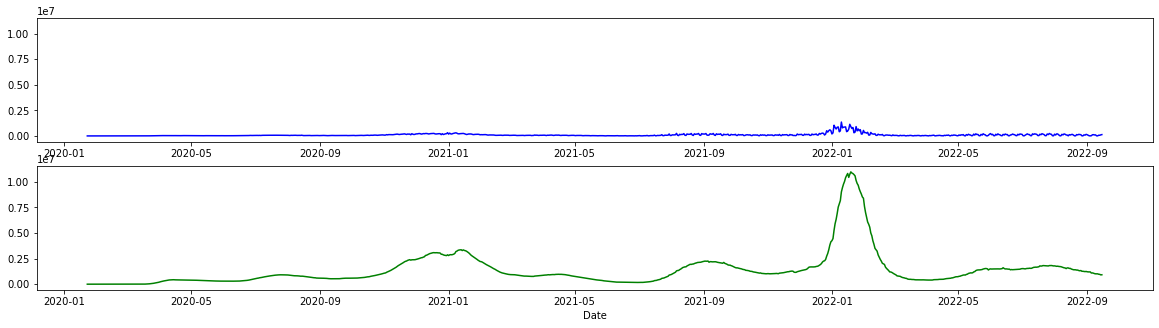

In [148]:
covid_data = covid_data.set_index("pk")


# Basic plot of total covid cases over time
fig, ax=plt.subplots(2,1, sharey=True)


data=covid_data[covid_data["iso_code"]=="USA"]
data1=covid_data[covid_data["iso_code"]=="USA"]

ax[0].plot(data["date"], data["new_cases"], color='b')
ax[1].plot(data["date"], data[new_column], color='g') #using the new_column function above that identifies the name of the new column

ax[1].set_xlabel("Date")

plt.show()

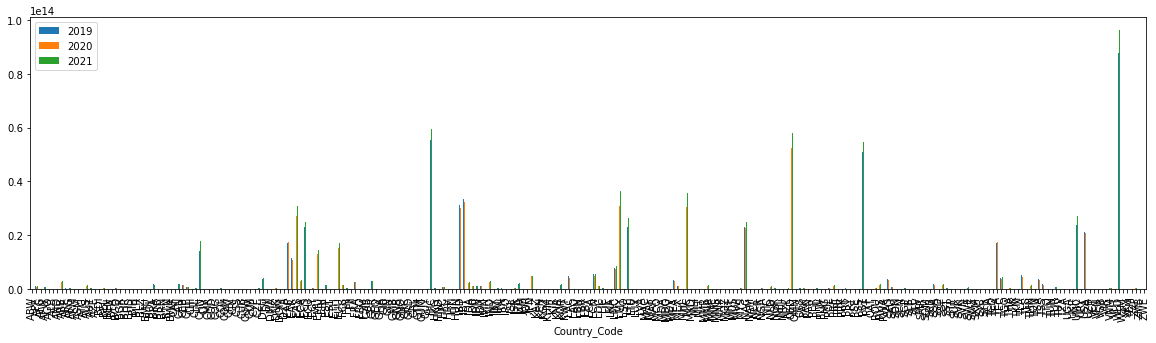

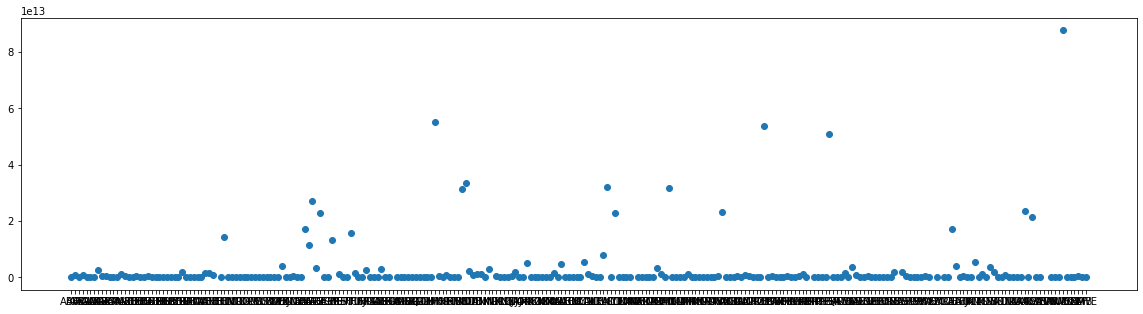

In [149]:
# Basic plot of total covid cases over time
#fig, ax=plt.subplots()

data=gdp_data


data.plot(x="Country_Code",y=["2019","2020","2021"], kind="bar")
#ax.bar(data["Country_Code"], data["2020"])

plt.show()

x=data["Country_Code"]
y=data["2019"] #,"2020","2021"]
colors =np.random.rand(30)

plt.scatter(x,y)
plt.show()


<h2 style="color:#00008b;">Implementation Process</h2>
(describe your entire process in detail)

For this project deciding on the data was quite a challenge.  I had quite a few ideas, but none seemed to have the data readily available to produce within the timeline or data did not appear to lend its self to the different techniques required


<h6>Hypothesis</h6>
My hypothesis is that countries with higher density and lower GDP have higher mortality rates than for higher density higher GDP countries. It would also be interesting to see if lower density and higher GDP countries fared and if density and GDP are a predicor of mortaility for a disease like COVID

Linking to data
	Different sources 

Exploring, Understanding and Cleaning data
	Print summary statistics
	Print DataFrame information
	Inspect for missing values
	
	Use visuals to identify issues with the data?
	
	df.info()
	df.shape
	df.size
	df.isnull()
	df.corr()
	List of column headers
	
	Handle the missing values (replace with NaN)
	
Joining data
Using dictionaries
Using dataframes
	
Charting
	Build a chart
		Colour, size, types
	Can we build a dashboard
	Can we make the charts interactive
	Annotate anomalies
	Build a story
	
	
Dates
	COVID creating 14 day averages per 100k of the population
		New cases
		Total cases
		New deaths
		Total deaths
		
	Can we identify the dates of lockdowns and the impact on positive cases per 100k; how long after a lockdown did the rates come back down, can we compare to a country that did not implement lockdowns
	
		Total positive cases
		Cases in hospital 
		Cases in ICU
		Reproduction rate
		
	Is there a correlation between
		The GDP of a country and the fatality
		The population density and the fatality
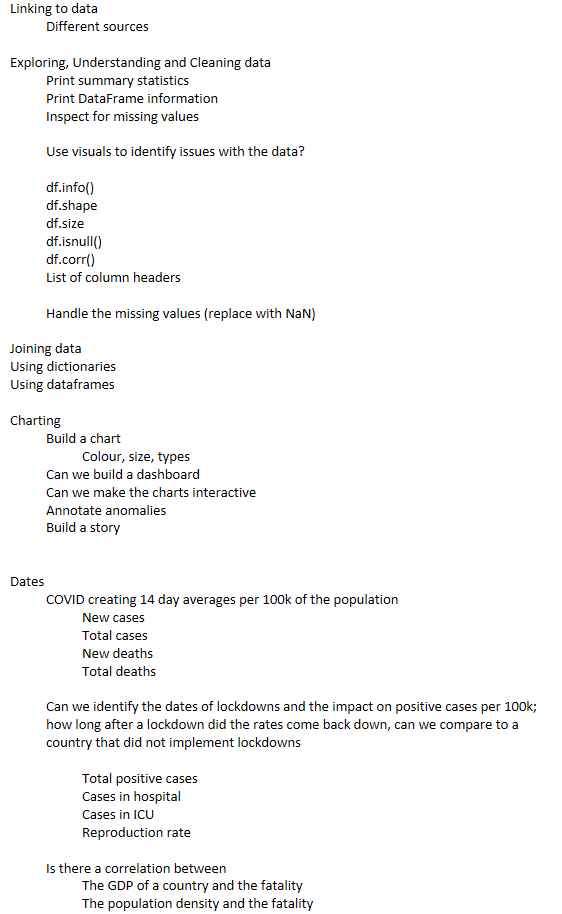

<h2 style="color:#00008b;">Results</h2>

<h2 style="color:#00008b;">Insights</h2>

<h2 style="color:#00008b;">References</h2>
HTML Code help: <a href="https://www.w3schools.com/html/html_links.asp" target="_blank">W3 Schools</a> 

Our World in Data (OWID): <a href="https://ourworldindata.org/coronavirus#explore-the-global-situation" target="_blank">https://ourworldindata.org/coronavirus#explore-the-global-situation</a> 

The World Bank GDP: <a href="https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false" target="_blank">https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false</a>

Python:
    <p>formatting numbers: https://pythonguides.com/python-format-number-with-commas/#:~:text=Python%20format%20number%20with%20commas%20Let%20us%20see,comma%20to%20every%20thousand%20places%20starting%20from%20left.</p>
    <p>formatting dates: https://stackabuse.com/how-to-format-dates-in-python/</p>
    